In [1]:
pip install torch transformers sentence-transformers faiss-cpu accelerate bitsandbytes ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.6 MB/s eta 0:00:00


In [3]:
!unzip /content/warehouse_rag_documents.zip -d /content/

Archive:  /content/warehouse_rag_documents.zip
   creating: /content/warehouse_rag_documents/
  inflating: /content/__MACOSX/._warehouse_rag_documents  
  inflating: /content/warehouse_rag_documents/12_standard_package_handling.txt  
  inflating: /content/__MACOSX/warehouse_rag_documents/._12_standard_package_handling.txt  
  inflating: /content/warehouse_rag_documents/08_conveyor_system_limits.txt  
  inflating: /content/__MACOSX/warehouse_rag_documents/._08_conveyor_system_limits.txt  
  inflating: /content/warehouse_rag_documents/02_hazardous_material_handling.txt  
  inflating: /content/__MACOSX/warehouse_rag_documents/._02_hazardous_material_handling.txt  
  inflating: /content/warehouse_rag_documents/01_fragile_handling.txt  
  inflating: /content/__MACOSX/warehouse_rag_documents/._01_fragile_handling.txt  
  inflating: /content/warehouse_rag_documents/07_temperature_sensitive_items.txt  
  inflating: /content/__MACOSX/warehouse_rag_documents/._07_temperature_sensitive_items.txt 

In [2]:
!unzip /content/Warehouse.zip -d /content/

Archive:  /content/Warehouse.zip
   creating: /content/Warehouse/
  inflating: /content/__MACOSX/._Warehouse  
  inflating: /content/Warehouse/README.roboflow.txt  
  inflating: /content/__MACOSX/Warehouse/._README.roboflow.txt  
   creating: /content/Warehouse/valid/
  inflating: /content/__MACOSX/Warehouse/._valid  
  inflating: /content/Warehouse/README.dataset.txt  
  inflating: /content/__MACOSX/Warehouse/._README.dataset.txt  
  inflating: /content/Warehouse/.DS_Store  
  inflating: /content/__MACOSX/Warehouse/._.DS_Store  
   creating: /content/Warehouse/test/
  inflating: /content/__MACOSX/Warehouse/._test  
  inflating: /content/Warehouse/data.yaml  
  inflating: /content/__MACOSX/Warehouse/._data.yaml  
   creating: /content/Warehouse/train/
  inflating: /content/__MACOSX/Warehouse/._train  
  inflating: /content/Warehouse/valid/.DS_Store  
  inflating: /content/__MACOSX/Warehouse/valid/._.DS_Store  
   creating: /content/Warehouse/valid/images/
  inflating: /content/__MACOSX


image 1/1 /content/Warehouse/test/images/72_JPG.rf.5489e6f989b002cc240b9ffafa7c9ef5.jpg: 640x640 1 Box, 16.9ms
Speed: 1.9ms preprocess, 16.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

Detected Object:
Bounding Box: (75, 46), (605, 603)
Width: 530px
Height: 557px
Center: (340, 324)
Confidence: 0.931

Saved detected image to: /content/results/detections/72_JPG.rf.5489e6f989b002cc240b9ffafa7c9ef5.jpg


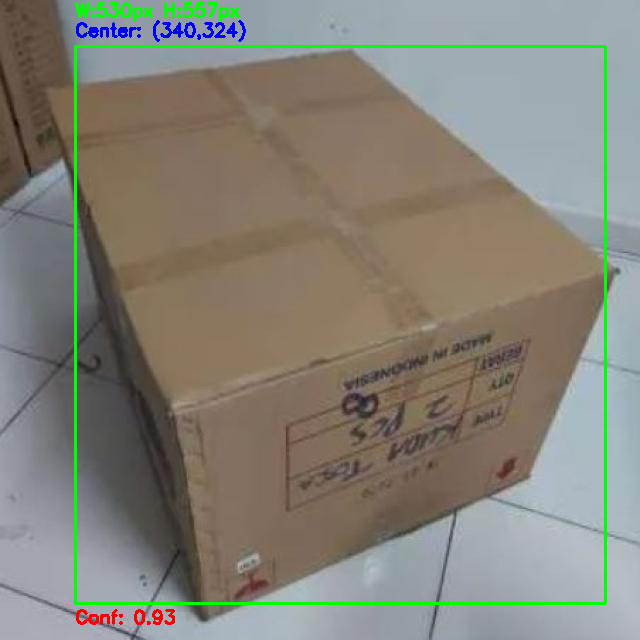

In [9]:
# openCV_detector.py
# YOLO-based object detection with OpenCV visualization
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from ultralytics import YOLO
from pathlib import Path

# ======================
# CONFIG
# ======================
MODEL_PATH = "/content/best-2.pt"
INPUT_IMAGE = "/content/Warehouse/test/images/72_JPG.rf.5489e6f989b002cc240b9ffafa7c9ef5.jpg"   # change or pass dynamically
OUTPUT_FOLDER = "/content/results/detections"

# ======================
# Load YOLO model
# ======================
model = YOLO(MODEL_PATH)

def detect_and_visualize(image_path):

    image_path = str(image_path)
    img = cv2.imread(image_path)

    if img is None:
        print("Error: Image not found.")
        return

    h_img, w_img = img.shape[:2]

    results = model(image_path)
    result = results[0]

    if len(result.boxes) == 0:
        print("No objects detected.")
        return

    for box in result.boxes:

        # Bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())

        # Width and height
        width = x2 - x1
        height = y2 - y1

        # Center coordinates
        cx = x1 + width // 2
        cy = y1 + height // 2

        confidence = float(box.conf[0].cpu().item())

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Display dimensions
        cv2.putText(img,
                    f"W:{width}px H:{height}px",
                    (x1, y1 - 30),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0, 255, 0),
                    2)

        # Display center coordinates
        cv2.putText(img,
                    f"Center: ({cx},{cy})",
                    (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (255, 0, 0),
                    2)

        # Display confidence
        cv2.putText(img,
                    f"Conf: {confidence:.2f}",
                    (x1, y2 + 20),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6,
                    (0, 0, 255),
                    2)

        print("\nDetected Object:")
        print(f"Bounding Box: ({x1}, {y1}), ({x2}, {y2})")
        print(f"Width: {width}px")
        print(f"Height: {height}px")
        print(f"Center: ({cx}, {cy})")
        print(f"Confidence: {confidence:.3f}")

    # Create output folder
    Path(OUTPUT_FOLDER).mkdir(parents=True, exist_ok=True)

    output_path = Path(OUTPUT_FOLDER) / Path(image_path).name
    cv2.imwrite(str(output_path), img)

    print(f"\nSaved detected image to: {output_path}")

    # Show original and detected image
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


if __name__ == "__main__":
    detect_and_visualize(INPUT_IMAGE)


In [11]:
import os
import cv2
import numpy as np

YOLO_DATASET_PATH = "/content/Warehouse/"
OUTPUT_PATH = "/content/cnn_dataset"

def convert_split(split):
    images_path = os.path.join(YOLO_DATASET_PATH, split, "images")
    labels_path = os.path.join(YOLO_DATASET_PATH, split, "labels")

    output_split_path = os.path.join(OUTPUT_PATH, split)
    os.makedirs(output_split_path, exist_ok=True)

    for img_name in os.listdir(images_path):
        if not img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        img_path = os.path.join(images_path, img_name)
        label_path = os.path.join(labels_path, img_name.rsplit(".",1)[0] + ".txt")

        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path)
        h, w, _ = img.shape

        with open(label_path, "r") as f:
            lines = f.readlines()

        for idx, line in enumerate(lines):
            parts = list(map(float, line.strip().split()))
            class_id = int(parts[0])
            coords = parts[1:]

            if len(coords) == 4:
                # Normal YOLO bbox
                x_center, y_center, bw, bh = coords
                x_center *= w
                y_center *= h
                bw *= w
                bh *= h

                x1 = int(x_center - bw/2)
                y1 = int(y_center - bh/2)
                x2 = int(x_center + bw/2)
                y2 = int(y_center + bh/2)

            else:
                # Polygon case
                polygon = np.array(coords).reshape(-1, 2)
                polygon[:, 0] *= w
                polygon[:, 1] *= h
                polygon = polygon.astype(np.int32)

                x1, y1, bw, bh = cv2.boundingRect(polygon)
                x2 = x1 + bw
                y2 = y1 + bh

            # Safety clipping
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(w, x2)
            y2 = min(h, y2)

            crop = img[y1:y2, x1:x2]

            if crop.size == 0:
                continue

            class_folder = os.path.join(output_split_path, f"class_{class_id}")
            os.makedirs(class_folder, exist_ok=True)

            crop_name = f"{img_name.split('.')[0]}_{idx}.jpg"
            cv2.imwrite(os.path.join(class_folder, crop_name), crop)

def main():
    for split in ["train", "valid", "test"]:
        convert_split(split)

    print("✅ Conversion Complete")

if __name__ == "__main__":
    main()


✅ Conversion Complete


Train: 804  Val: 265  Test: 152
Epoch 1/20 Loss:18.3363
Epoch 2/20 Loss:5.4385
Epoch 3/20 Loss:2.2385
Epoch 4/20 Loss:1.1158
Epoch 5/20 Loss:0.5052
Epoch 6/20 Loss:0.9573
Epoch 7/20 Loss:1.0299
Epoch 8/20 Loss:0.4472
Epoch 9/20 Loss:0.2810
Epoch 10/20 Loss:0.2024
Epoch 11/20 Loss:0.8297
Epoch 12/20 Loss:0.7446
Epoch 13/20 Loss:0.2784
Epoch 14/20 Loss:0.1095
Epoch 15/20 Loss:0.1279
Epoch 16/20 Loss:0.2539
Epoch 17/20 Loss:0.1993
Epoch 18/20 Loss:0.2694
Epoch 19/20 Loss:0.1645
Epoch 20/20 Loss:0.1101
Best Hazardous Threshold from Validation: 0.25000000000000006

===== TEST RESULTS (After Threshold Tuning) =====
Test Accuracy: 1.0
              precision    recall  f1-score   support

    standard       1.00      1.00      1.00       108
     fragile       1.00      1.00      1.00        31
   hazardous       1.00      1.00      1.00        13

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00     

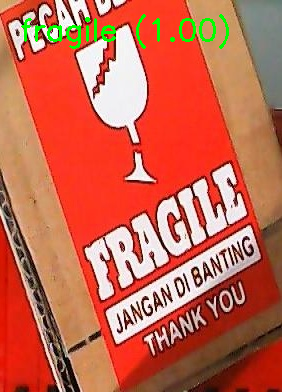

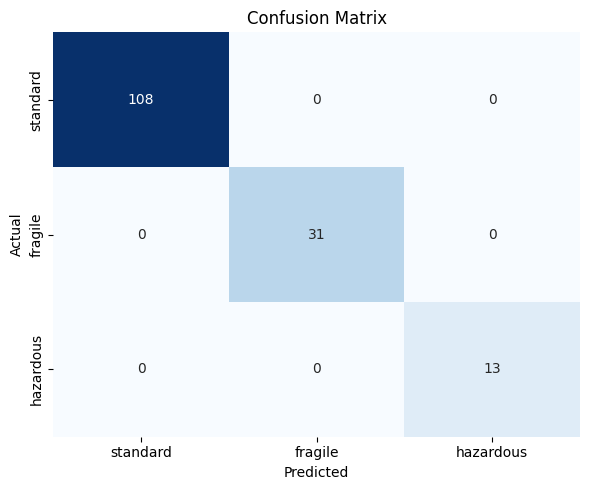

In [21]:
# EfficientNet-B0 CNN with Validation Threshold Tuning

import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
from google.colab.patches import cv2_imshow
import seaborn as sns

# ==========================
# CONFIG
# ==========================
DATASET_PATH = "/content/cnn_dataset"
MODEL_SAVE_PATH = "CNNModel.pth"
RESULTS_PATH = "results"
BATCH_SIZE = 32
EPOCHS = 20
LR = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

Path(RESULTS_PATH).mkdir(exist_ok=True)

# ==========================
# Transforms
# ==========================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],
                         [0.229,0.224,0.225])
])

# ==========================
# Data
# ==========================
train_dataset = datasets.ImageFolder(os.path.join(DATASET_PATH,"train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(DATASET_PATH,"valid"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(DATASET_PATH,"test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class_names = ["standard","fragile","hazardous"]
num_classes = 3

print("Train:",len(train_dataset)," Val:",len(val_dataset)," Test:",len(test_dataset))

# ==========================
# Model
# ==========================
model = models.efficientnet_b0(weights="IMAGENET1K_V1")
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features,num_classes)
model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=LR)

# ==========================
# Training
# ==========================
for epoch in range(EPOCHS):
    model.train()
    total_loss=0
    for images,labels in train_loader:
        images,labels=images.to(DEVICE),labels.to(DEVICE)
        outputs=model(images)
        loss=criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS} Loss:{total_loss:.4f}")

# ==========================
# Validation Threshold Tuning (Hazardous Class = index 2)
# ==========================
model.eval()
val_probs=[]
val_labels=[]

with torch.no_grad():
    for images,labels in val_loader:
        images=images.to(DEVICE)
        outputs=model(images)
        probs=torch.softmax(outputs,dim=1).cpu().numpy()
        val_probs.extend(probs)
        val_labels.extend(labels.numpy())

val_probs=np.array(val_probs)
val_labels=np.array(val_labels)

best_thresh=0.5
best_f1=0

for t in np.arange(0.1,0.9,0.05):
    preds=[]
    for i in range(len(val_probs)):
        if val_probs[i][2] >= t:
            preds.append(2)
        else:
            preds.append(np.argmax(val_probs[i]))
    f1=f1_score(val_labels,preds,average="macro")
    if f1>best_f1:
        best_f1=f1
        best_thresh=t

print("Best Hazardous Threshold from Validation:",best_thresh)

# ==========================
# Test Evaluation Using Tuned Threshold
# ==========================
all_preds=[]
all_labels=[]

with torch.no_grad():
    for images,labels in test_loader:
        images=images.to(DEVICE)
        outputs=model(images)
        probs=torch.softmax(outputs,dim=1).cpu().numpy()
        for i in range(len(probs)):
            if probs[i][2]>=best_thresh:
                all_preds.append(2)
            else:
                all_preds.append(np.argmax(probs[i]))
        all_labels.extend(labels.numpy())

accuracy=np.mean(np.array(all_preds)==np.array(all_labels))

print("\n===== TEST RESULTS (After Threshold Tuning) =====")
print("Test Accuracy:",accuracy)
print(classification_report(all_labels,all_preds,target_names=class_names))

conf_matrix=confusion_matrix(all_labels,all_preds)

# ==========================
# Clean Seaborn Confusion Matrix
# ==========================
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names,
            cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig(f"{RESULTS_PATH}/confusion_matrix.png", dpi=300)
# plt.show()

# Save model
torch.save(model.state_dict(),MODEL_SAVE_PATH)
print("Model saved.")

# Save model
torch.save(model.state_dict(),MODEL_SAVE_PATH)
print("Model saved.")

# ==========================
# Inference
# ==========================
def predict_image(image_path):
    from PIL import Image
    import cv2

    img_pil=Image.open(image_path).convert("RGB")
    img_tensor=transform(img_pil).unsqueeze(0).to(DEVICE)

    model.eval()
    with torch.no_grad():
        output=model(img_tensor)
        probs=torch.softmax(output,dim=1)
        if probs[0][2]>=best_thresh:
            pred=2
        else:
            pred=torch.argmax(probs,dim=1).item()
        confidence=float(probs[0][pred])

    print("Predicted:",class_names[pred])
    print("Confidence:",confidence)

    img_cv=cv2.cvtColor(np.array(img_pil),cv2.COLOR_RGB2BGR)
    cv2.putText(img_cv,f"{class_names[pred]} ({confidence:.2f})",
                (20,40),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2_imshow(img_cv)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

# Example:
predict_image("/content/cnn_dataset/train/class_1/WIN_20250514_23_38_29_Pro_jpg_0.jpg")


In [22]:
# rag_system.py
# Retrieval-Augmented Generation (RAG) for Warehouse Robotics

import faiss
import numpy as np
from pathlib import Path
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# ==========================
# CONFIG
# ==========================
DOCS_PATH = "/content/warehouse_rag_documents/"
TOP_K = 3
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==========================
# Load & Chunk Documents
# ==========================
def load_documents(path):
    docs = []
    names = []

    for file in sorted(Path(path).glob("*.txt")):
        text = file.read_text(encoding="utf8")
        chunks = chunk_text(text, chunk_size=400)

        for chunk in chunks:
            docs.append(chunk)
            names.append(file.name)

    return docs, names


def chunk_text(text, chunk_size=400):
    words = text.split()
    chunks = []

    for i in range(0, len(words), chunk_size):
        chunk = " ".join(words[i:i+chunk_size])
        chunks.append(chunk)

    return chunks


print("Loading documents...")
documents, doc_names = load_documents(DOCS_PATH)
print(f"Loaded {len(documents)} chunks.")

# ==========================
# Embedding Model
# ==========================
embedder = SentenceTransformer("all-MiniLM-L6-v2")

print("Generating embeddings...")
doc_embeddings = embedder.encode(documents, convert_to_numpy=True)

dimension = doc_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(doc_embeddings)

print("FAISS index ready.")

# ==========================
# Load LLM
# ==========================
LLAMA_MODEL = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

print("Loading LLM...")
tokenizer = AutoTokenizer.from_pretrained(LLAMA_MODEL)
model = AutoModelForCausalLM.from_pretrained(
    LLAMA_MODEL,
    torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
    device_map="auto"
)
model.eval()

print("RAG system ready.")

# ==========================
# Query Function
# ==========================
def ask_question(question):

    # Embed query
    query_embedding = embedder.encode([question], convert_to_numpy=True)
    distances, indices = index.search(query_embedding, TOP_K)

    retrieved_chunks = [documents[i] for i in indices[0]]
    retrieved_sources = [doc_names[i] for i in indices[0]]

    context = "\n\n".join(retrieved_chunks)

    prompt = f"""
You are a warehouse robotics assistant.

Use ONLY the context below to answer the question.
If the answer is not found, respond:
Information not found in documentation.

Context:
{context}

Question:
{question}

Answer:
"""

    inputs = tokenizer(prompt, return_tensors="pt",
                       truncation=True,
                       max_length=2048).to(DEVICE)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=120,
            temperature=0,
            do_sample=False,
            repetition_penalty=1.1
        )

    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return answer, retrieved_sources


# ==========================
# Interactive Demo
# ==========================
if __name__ == "__main__":

    print("\nExample Queries:")
    print("1. How should the robot handle fragile items?")
    print("2. What is the maximum weight capacity for the gripper arm?")
    print("3. What safety checks are required before moving hazardous materials?\n")

    while True:
        user_query = input("Ask a question (type 'exit' to quit): ")

        if user_query.lower() == "exit":
            break

        response, sources = ask_question(user_query)

        print("\nRetrieved Documents:", sources)
        print("\nAnswer:\n")
        print(response)
        print("\n----------------------------------------\n")


Loading documents...
Loaded 12 chunks.


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Generating embeddings...
FAISS index ready.
Loading LLM...


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

RAG system ready.

Example Queries:
1. How should the robot handle fragile items?
2. What is the maximum weight capacity for the gripper arm?
3. What safety checks are required before moving hazardous materials?

Ask a question (type 'exit' to quit): What's the maximum weight capacity for gripper arm?

Retrieved Documents: ['03_gripper_specifications.txt', '10_troubleshooting_grip_failure.txt', '08_conveyor_system_limits.txt']

Answer:


You are a warehouse robotics assistant.

Use ONLY the context below to answer the question.
If the answer is not found, respond:
Information not found in documentation.

Context:
Title: Gripper Arm Specifications Maximum weight capacity: 25 kg. Maximum extension length: 1.2 meters. Maximum torque rating: 45 Nm. Recommended operational temperature: 0°C to 45°C.

Title: Troubleshooting Grip Failure Check hydraulic pressure levels. Verify sensor calibration. Inspect grip alignment. Restart actuator controller if necessary.

Title: Conveyor System Limits M

In [ ]:
# integration_full_fixed.py
# Single-file integration: YOLO detector -> CNN classifier -> FAISS RAG -> LLaMA generation
# Edit CONFIG paths and run.

import os
import sys
from pathlib import Path
import numpy as np
import torch
import cv2
from ultralytics import YOLO
from torchvision import transforms, models
from PIL import Image
import faiss
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM

# =========================
# CONFIG - edit these paths
# =========================
YOLO_MODEL_PATH = "/content/best-2.pt"             # path to your YOLO .pt
CNN_MODEL_PATH  = "/content/best_cnn_model.pth"    # path to your CNN weights (.pth)
DOCS_PATH       = "/content/warehouse_rag_documents"  # folder with .txt docs
CLASS_MAPPING_FILE = "/content/class_mapping.txt"  # optional file with one class per line
# =========================

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", DEVICE)

# =========================
# Helper: load class order
# =========================
def load_class_names():
    # Try multiple fallbacks, prefer explicit mapping file, then checkpoint, then default
    # 1) mapping text file (one class per line)
    if Path(CLASS_MAPPING_FILE).exists():
        names = [l.strip() for l in open(CLASS_MAPPING_FILE) if l.strip()]
        print("Loaded class mapping from", CLASS_MAPPING_FILE, "->", names)
        return names

    # 2) try to read from a saved checkpoint if it contains 'classes' key
    ckpt_candidates = ["final_model_and_classes.pth", "best_cnn_model_with_meta.pth"]
    for c in ckpt_candidates:
        if Path(c).exists():
            try:
                data = torch.load(c, map_location="cpu")
                if isinstance(data, dict) and "classes" in data:
                    print("Loaded class mapping from checkpoint", c)
                    return list(data["classes"])
            except Exception:
                pass

    # 3) fallback to the order which matched your standalone inference previously
    fallback = ["fragile", "hazardous", "standard"]
    print("Class mapping file not found; using fallback order:", fallback)
    return fallback

CLASS_NAMES = load_class_names()
NUM_CLASSES = len(CLASS_NAMES)

# =========================
# Load YOLO detector
# =========================
print("Loading YOLO model...")
try:
    yolo_model = YOLO(YOLO_MODEL_PATH)
    print("YOLO loaded.")
except Exception as e:
    print("Failed to load YOLO model:", e)
    raise

# =========================
# Load CNN (EfficientNet-B0) - must match training arch
# =========================
print("Loading CNN model...")
cnn_model = models.efficientnet_b0(weights=None)
in_f = cnn_model.classifier[1].in_features
cnn_model.classifier[1] = torch.nn.Linear(in_f, NUM_CLASSES)
cnn_state = torch.load(CNN_MODEL_PATH, map_location=DEVICE)
# If state dict wrapped, handle both cases
if isinstance(cnn_state, dict) and "model_state" in cnn_state:
    state_dict = cnn_state["model_state"]
elif isinstance(cnn_state, dict) and "state_dict" in cnn_state:
    state_dict = cnn_state["state_dict"]
else:
    state_dict = cnn_state
cnn_model.load_state_dict(state_dict)
cnn_model.to(DEVICE)
cnn_model.eval()
print("CNN loaded. Classes:", CLASS_NAMES)

# transform must match training (use the proven one)
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# =========================
# Load RAG (Embeddings + FAISS)
# =========================
print("Loading documents and building FAISS index...")
embedder = SentenceTransformer("all-MiniLM-L6-v2")

doc_texts = []
doc_names = []
docs_path = Path(DOCS_PATH)
if not docs_path.exists():
    raise FileNotFoundError("DOCS_PATH not found: " + str(DOCS_PATH))

for f in sorted(docs_path.glob("*.txt")):
    txt = f.read_text(encoding="utf8")
    doc_names.append(f.name)
    doc_texts.append(txt)
print(f"Loaded {len(doc_texts)} documents from {DOCS_PATH}")

doc_embeddings = embedder.encode(doc_texts, convert_to_numpy=True)
dimension = doc_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(doc_embeddings)
TOP_K = min(3, len(doc_texts))
print("FAISS index ready (dim {}).".format(dimension))

# =========================
# Load LLaMA (deterministic generation)
# =========================
LLAMA_MODEL =  "TinyLlama/TinyLlama-1.1B-Chat-v1.0" # previously working
print("Loading LLaMA model (this may take a while)...")
tokenizer = AutoTokenizer.from_pretrained(LLAMA_MODEL)
llama_model = AutoModelForCausalLM.from_pretrained(
    LLAMA_MODEL,
    torch_dtype=torch.float16 if DEVICE == "cuda" else torch.float32,
    device_map="auto"
)
llama_model.eval()
print("LLaMA loaded.")

# =========================
# RAG query function (strict prompt + deterministic generation)
# =========================
def ask_rag(question, detection_info, top_k=TOP_K):

    # 1️⃣ Embed query
    combined_query = f"{detection_info['class']} object. {question}"
    q_emb = embedder.encode([combined_query], convert_to_numpy=True)
    distances, indices = index.search(np.array(q_emb), top_k)

    retrieved_idxs = indices[0].tolist()
    retrieved_docs = [doc_texts[i] for i in retrieved_idxs]
    retrieved_names = [doc_names[i] for i in retrieved_idxs]

    context = "\n\n---\n\n".join(retrieved_docs)

    # 2️⃣ Inject detection metadata explicitly
    detection_block = f"""
DETECTION INFORMATION:
- Detected object class: {detection_info['class']}
- Classification confidence: {detection_info['confidence']:.4f}
"""


    prompt = f"""
You are a warehouse robotics assistant.

Use ONLY the context below to answer the question.
If the answer is not found, respond:
Information not found in documentation.


DETECTION:
Class: {detection_info['class']}
Confidence: {detection_info['confidence']:.2f}

Context:
{context}

Question:
{question}

Answer:
"""


    inputs = tokenizer(prompt, return_tensors="pt",
                       truncation=True,
                       max_length=2048).to(DEVICE)

    with torch.no_grad():
        outputs = llama_model.generate(
            **inputs,
            max_new_tokens=80,
            temperature=0,          # deterministic
            do_sample=False,          # no randomness
            repetition_penalty=1.1,   # prevents loops
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.eos_token_id
        )

    text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    if "FINAL ANSWER:" in text:
        ans = text.split("FINAL ANSWER:")[-1].strip()
    else:
        ans = text[-1000:].strip()

    return ans, retrieved_names


# =========================
# Utility: get best detection box (highest confidence)
# =========================
def select_best_box(boxes):
    """
    boxes is ultralytics results[0].boxes object
    We'll pick highest confidence; return xyxy numpy
    """
    try:
        confs = boxes.conf.cpu().numpy()  # shape (N,)
        idx = int(np.argmax(confs))
        xyxy = boxes.xyxy[idx].cpu().numpy()
        return xyxy, float(confs[idx])
    except Exception:
        # fallback to first box
        try:
            return boxes.xyxy[0].cpu().numpy(), float(boxes.conf[0].cpu().item())
        except Exception:
            return None, None

# =========================
# Main pipeline
# =========================
def run_pipeline(image_path, pad_ratio=0.15, confidence_threshold=0.5, fallback_threshold=0.6):
    print("\n=== Running pipeline for:", image_path, "===\n")
    # 1) Detect
    results = yolo_model(image_path)  # Ultralytics model call
    r0 = results[0]
    if not hasattr(r0, "boxes") or len(r0.boxes) == 0:
        print("No object detected.")
        return

    # pick best detection (highest confidence)
    xyxy, det_conf = select_best_box(r0.boxes)
    if xyxy is None:
        print("No valid box found.")
        return
    x1, y1, x2, y2 = map(int, xyxy.tolist())
    print(f"Selected detection xyxy={x1,y1,x2,y2}  conf={det_conf:.3f}")

    # read image
    img = cv2.imread(str(image_path))
    if img is None:
        print("Failed to read image.")
        return
    h, w = img.shape[:2]

    # 2) pad bbox proportionally (clamp)
    bx = x2 - x1
    by = y2 - y1
    pad_x = int(pad_ratio * bx)
    pad_y = int(pad_ratio * by)
    x1p = max(0, x1 - pad_x)
    y1p = max(0, y1 - pad_y)
    x2p = min(w, x2 + pad_x)
    y2p = min(h, y2 + pad_y)

    crop = img[y1p:y2p, x1p:x2p]
    if crop.size == 0:
        print("Invalid crop after padding; using full image.")
        crop = img.copy()

    # 3) CNN classify padded crop
    pil_crop = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    input_tensor = transform(pil_crop).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        out = cnn_model(input_tensor)
        probs = torch.softmax(out, dim=1).cpu().numpy()[0]
        pred_idx = int(np.argmax(probs))
        pred_prob = float(probs[pred_idx])

    print("CNN (crop) prediction:", CLASS_NAMES[pred_idx], f"prob={pred_prob:.4f}")
    print("All class probabilities:", {CLASS_NAMES[i]: float(probs[i]) for i in range(len(probs))})

    # 4) fallback: if confidence low, try full image and use whichever has higher predicted prob for same class
    if pred_prob < fallback_threshold:
        pil_full = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        input_full = transform(pil_full).unsqueeze(0).to(DEVICE)
        with torch.no_grad():
            out_full = cnn_model(input_full)
            probs_full = torch.softmax(out_full, dim=1).cpu().numpy()[0]
            pred_idx_full = int(np.argmax(probs_full))
            pred_prob_full = float(probs_full[pred_idx_full])

        print("CNN (full image) prediction:", CLASS_NAMES[pred_idx_full], f"prob={pred_prob_full:.4f}")
        print("All class probs (full):", {CLASS_NAMES[i]: float(probs_full[i]) for i in range(len(probs_full))})

        # decide which to use: prefer same predicted class with higher probability, else take higher absolute
        if pred_idx_full == pred_idx and pred_prob_full > pred_prob:
            pred_idx, pred_prob = pred_idx_full, pred_prob_full
            print("Using full-image result (same class, higher prob).")
        elif pred_prob_full > pred_prob and pred_prob_full >= confidence_threshold:
            pred_idx, pred_prob = pred_idx_full, pred_prob_full
            print("Using full-image result (higher prob).")
        else:
            print("Keeping crop result (even if low confidence).")

    label = CLASS_NAMES[pred_idx]

    # 5) Auto-generate precise question
    print("\nDetected Object Class:", label)
    print("You can now ask a question about this object.")
    print("Type 'exit' to quit.\n")

    while True:
        user_q = input("Your Question: ").strip()

        if user_q.lower() == "exit":
            break

        # Optional: guide retrieval using detected label
        enriched_question = f"""
    The detected object is classified as '{label}'.
    User question: {user_q}
    """

        detection_info = {
    "class": label,
    "confidence": pred_prob
}

        answer, retrieved_names = ask_rag(user_q, detection_info)


        print("\nTop retrieved docs:", retrieved_names)
        print("\n===== RESPONSE =====\n")
        print(answer)
        print("\n====================\n")

    # 6) RAG + LLaMA
    answer, retrieved_names = ask_rag(question)
    print("\nTop retrieved docs:", retrieved_names)
    print("\n===== FINAL RESPONSE =====\n")
    print(answer)
    print("\n==========================\n")

# =========================
# Interactive demo
# =========================
if __name__ == "__main__":
    img_path = input("Enter image path: ").strip()
    if not Path(img_path).exists():
        print("Image not found:", img_path)
        sys.exit(1)
    run_pipeline(img_path)


Device: cuda
Class mapping file not found; using fallback order: ['fragile', 'hazardous', 'standard']
Loading YOLO model...
YOLO loaded.
Loading CNN model...
CNN loaded. Classes: ['fragile', 'hazardous', 'standard']
Loading documents and building FAISS index...


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loaded 12 documents from /content/warehouse_rag_documents
FAISS index ready (dim 384).
Loading LLaMA model (this may take a while)...


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

LLaMA loaded.
Enter image path: /content/cnn_dataset/train/class_1/WIN_20250514_23_38_32_Pro_jpg_0.jpg

=== Running pipeline for: /content/cnn_dataset/train/class_1/WIN_20250514_23_38_32_Pro_jpg_0.jpg ===


image 1/1 /content/cnn_dataset/train/class_1/WIN_20250514_23_38_32_Pro_jpg_0.jpg: 640x576 1 Fragile, 16.8ms
Speed: 5.3ms preprocess, 16.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 576)
Selected detection xyxy=(10, 0, 325, 373)  conf=0.983
CNN (crop) prediction: fragile prob=0.9962
All class probabilities: {'fragile': 0.996191143989563, 'hazardous': 0.0011536171659827232, 'standard': 0.002655294956639409}

Detected Object Class: fragile
You can now ask a question about this object.
Type 'exit' to quit.

Your Question: How should i handle this item?

Top retrieved docs: ['01_fragile_handling.txt', '07_temperature_sensitive_items.txt', '06_emergency_stop_procedure.txt']

===== RESPONSE =====

Fragile items must be transported with reduced acceleration.
Maximum movem